In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset from the file
df_thera = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

# copy of the dataset
df_thera_copy = df_thera.copy(deep=True)

df_thera.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# check for the dataset dimensions
df_thera.shape

(5000, 14)

In [4]:
# columns information 
df_thera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#1. There are 13 integer and 1 float attributes
#2. There seems to be no null columns as all the columns are having 5000 non null objects

In [6]:
# checking for null values 
df_thera.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
#1. Confirming there are no null columns

In [8]:
# statistical information on the columns 
df_thera.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
#1. People with age 23 and above and less than 68 is covered through the dataset
#2. Experience there is negative values which needs to be cleaned
#3. Age and Experience the mean and the median seems to be almost the same. The might show the data is distributed normally.
#4. Income and Mortgage are right skewed.

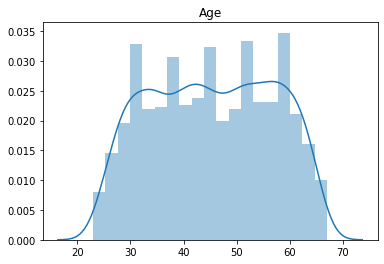

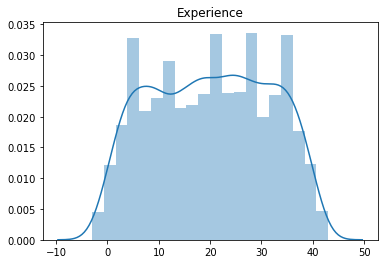

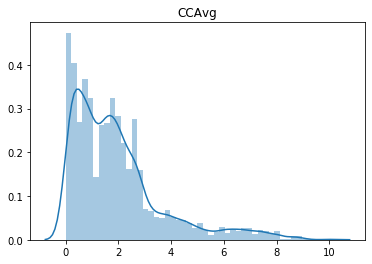

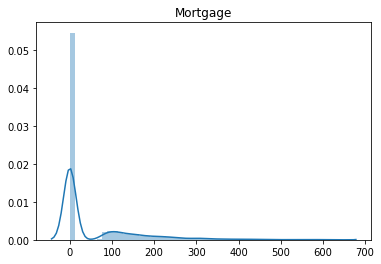

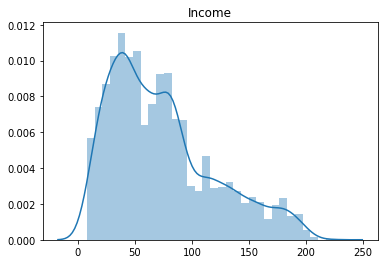

In [10]:
# Checking the distribution of the attributes Experience, Age, CCAvg, Mortgage and Income

plt.title("Age")
sns.distplot(df_thera['Age'], axlabel=False)
plt.show()

plt.title("Experience")
sns.distplot(df_thera['Experience'], axlabel=False)
plt.show()

plt.title("CCAvg")
sns.distplot(df_thera['CCAvg'], axlabel=False)
plt.show()

plt.title("Mortgage")
sns.distplot(df_thera['Mortgage'], axlabel=False)
plt.show()

plt.title("Income")
sns.distplot(df_thera['Income'], axlabel=False)
plt.show()

In [11]:
#1. Martgage, Income and CCAvg are right skewed.
#2. Age and Experience data are distributed evenly but not having a normal distirbution curve.

0    4478
1     522
Name: Securities Account, dtype: int64


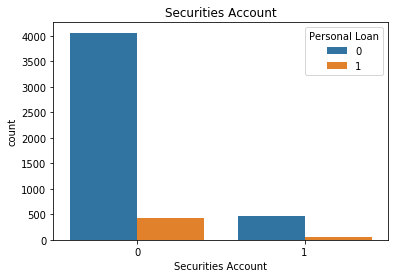

0    4698
1     302
Name: CD Account, dtype: int64


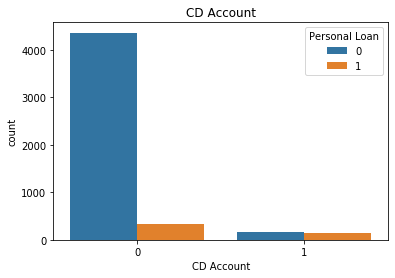

1    2984
0    2016
Name: Online, dtype: int64


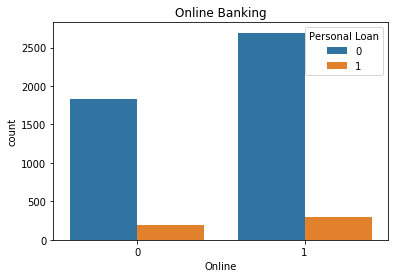

0    3530
1    1470
Name: CreditCard, dtype: int64


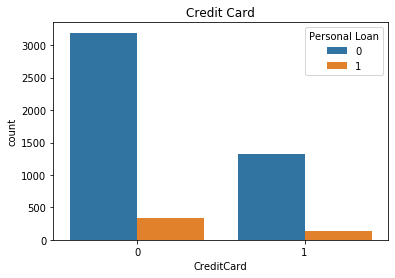

In [12]:
# visualising the binary attributes securities account, CD account, online banking and credit card. 

print(df_thera['Securities Account'].value_counts())
plt.title("Securities Account")
sns.countplot(df_thera['Securities Account'], hue= df_thera['Personal Loan'])
plt.show()

print(df_thera['CD Account'].value_counts())
plt.title("CD Account")
sns.countplot(df_thera['CD Account'], hue= df_thera['Personal Loan'])
plt.show()

print(df_thera['Online'].value_counts())
plt.title("Online Banking")
sns.countplot(df_thera['Online'], hue= df_thera['Personal Loan'])
plt.show()

print(df_thera['CreditCard'].value_counts())
plt.title("Credit Card")
sns.countplot(df_thera['CreditCard'], hue= df_thera['Personal Loan'])
plt.show()

In [13]:
#1. 60% of the customers have opted for online banking.
#2. 90% of the customers do not have the Securities account.
#3. 94% of the customers do not CD account.
#4. 70% of the customers do not have credit card.
#5. Customers with online banking is tending towards availing personal loan.
#6. Customers without Securites account, CD account and credit card are having opted to the personal loan.

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


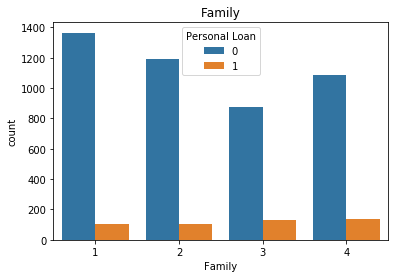

1    2096
3    1501
2    1403
Name: Education, dtype: int64


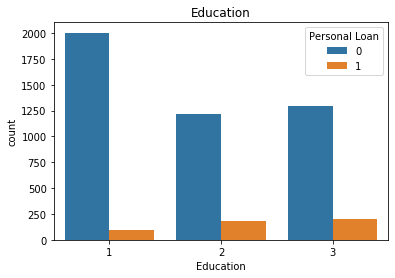

In [14]:
# visualizing the ordinal attributes family and education

print(df_thera['Family'].value_counts())
plt.title("Family")
sns.countplot(df_thera['Family'], hue=df_thera['Personal Loan'])
plt.show()

print(df_thera['Education'].value_counts())
plt.title("Education")
sns.countplot(df_thera['Education'], hue=df_thera['Personal Loan'])
plt.show()

In [15]:
#1. Customer base seems to be mostly individual.
#2. Most of the customers seems to be undergrads.
#3. Customers with the family size of 4 or with the professional education level has opted for the personal loan.

0    4520
1     480
Name: Personal Loan, dtype: int64


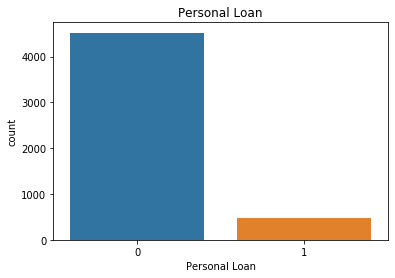

In [16]:
# Visualizing the Target Variable Personal Loan
print(df_thera['Personal Loan'].value_counts())
plt.title("Personal Loan")
sns.countplot(df_thera['Personal Loan'])
plt.show()

In [17]:
# Only ~10% of the customers have opted for the personal loan.

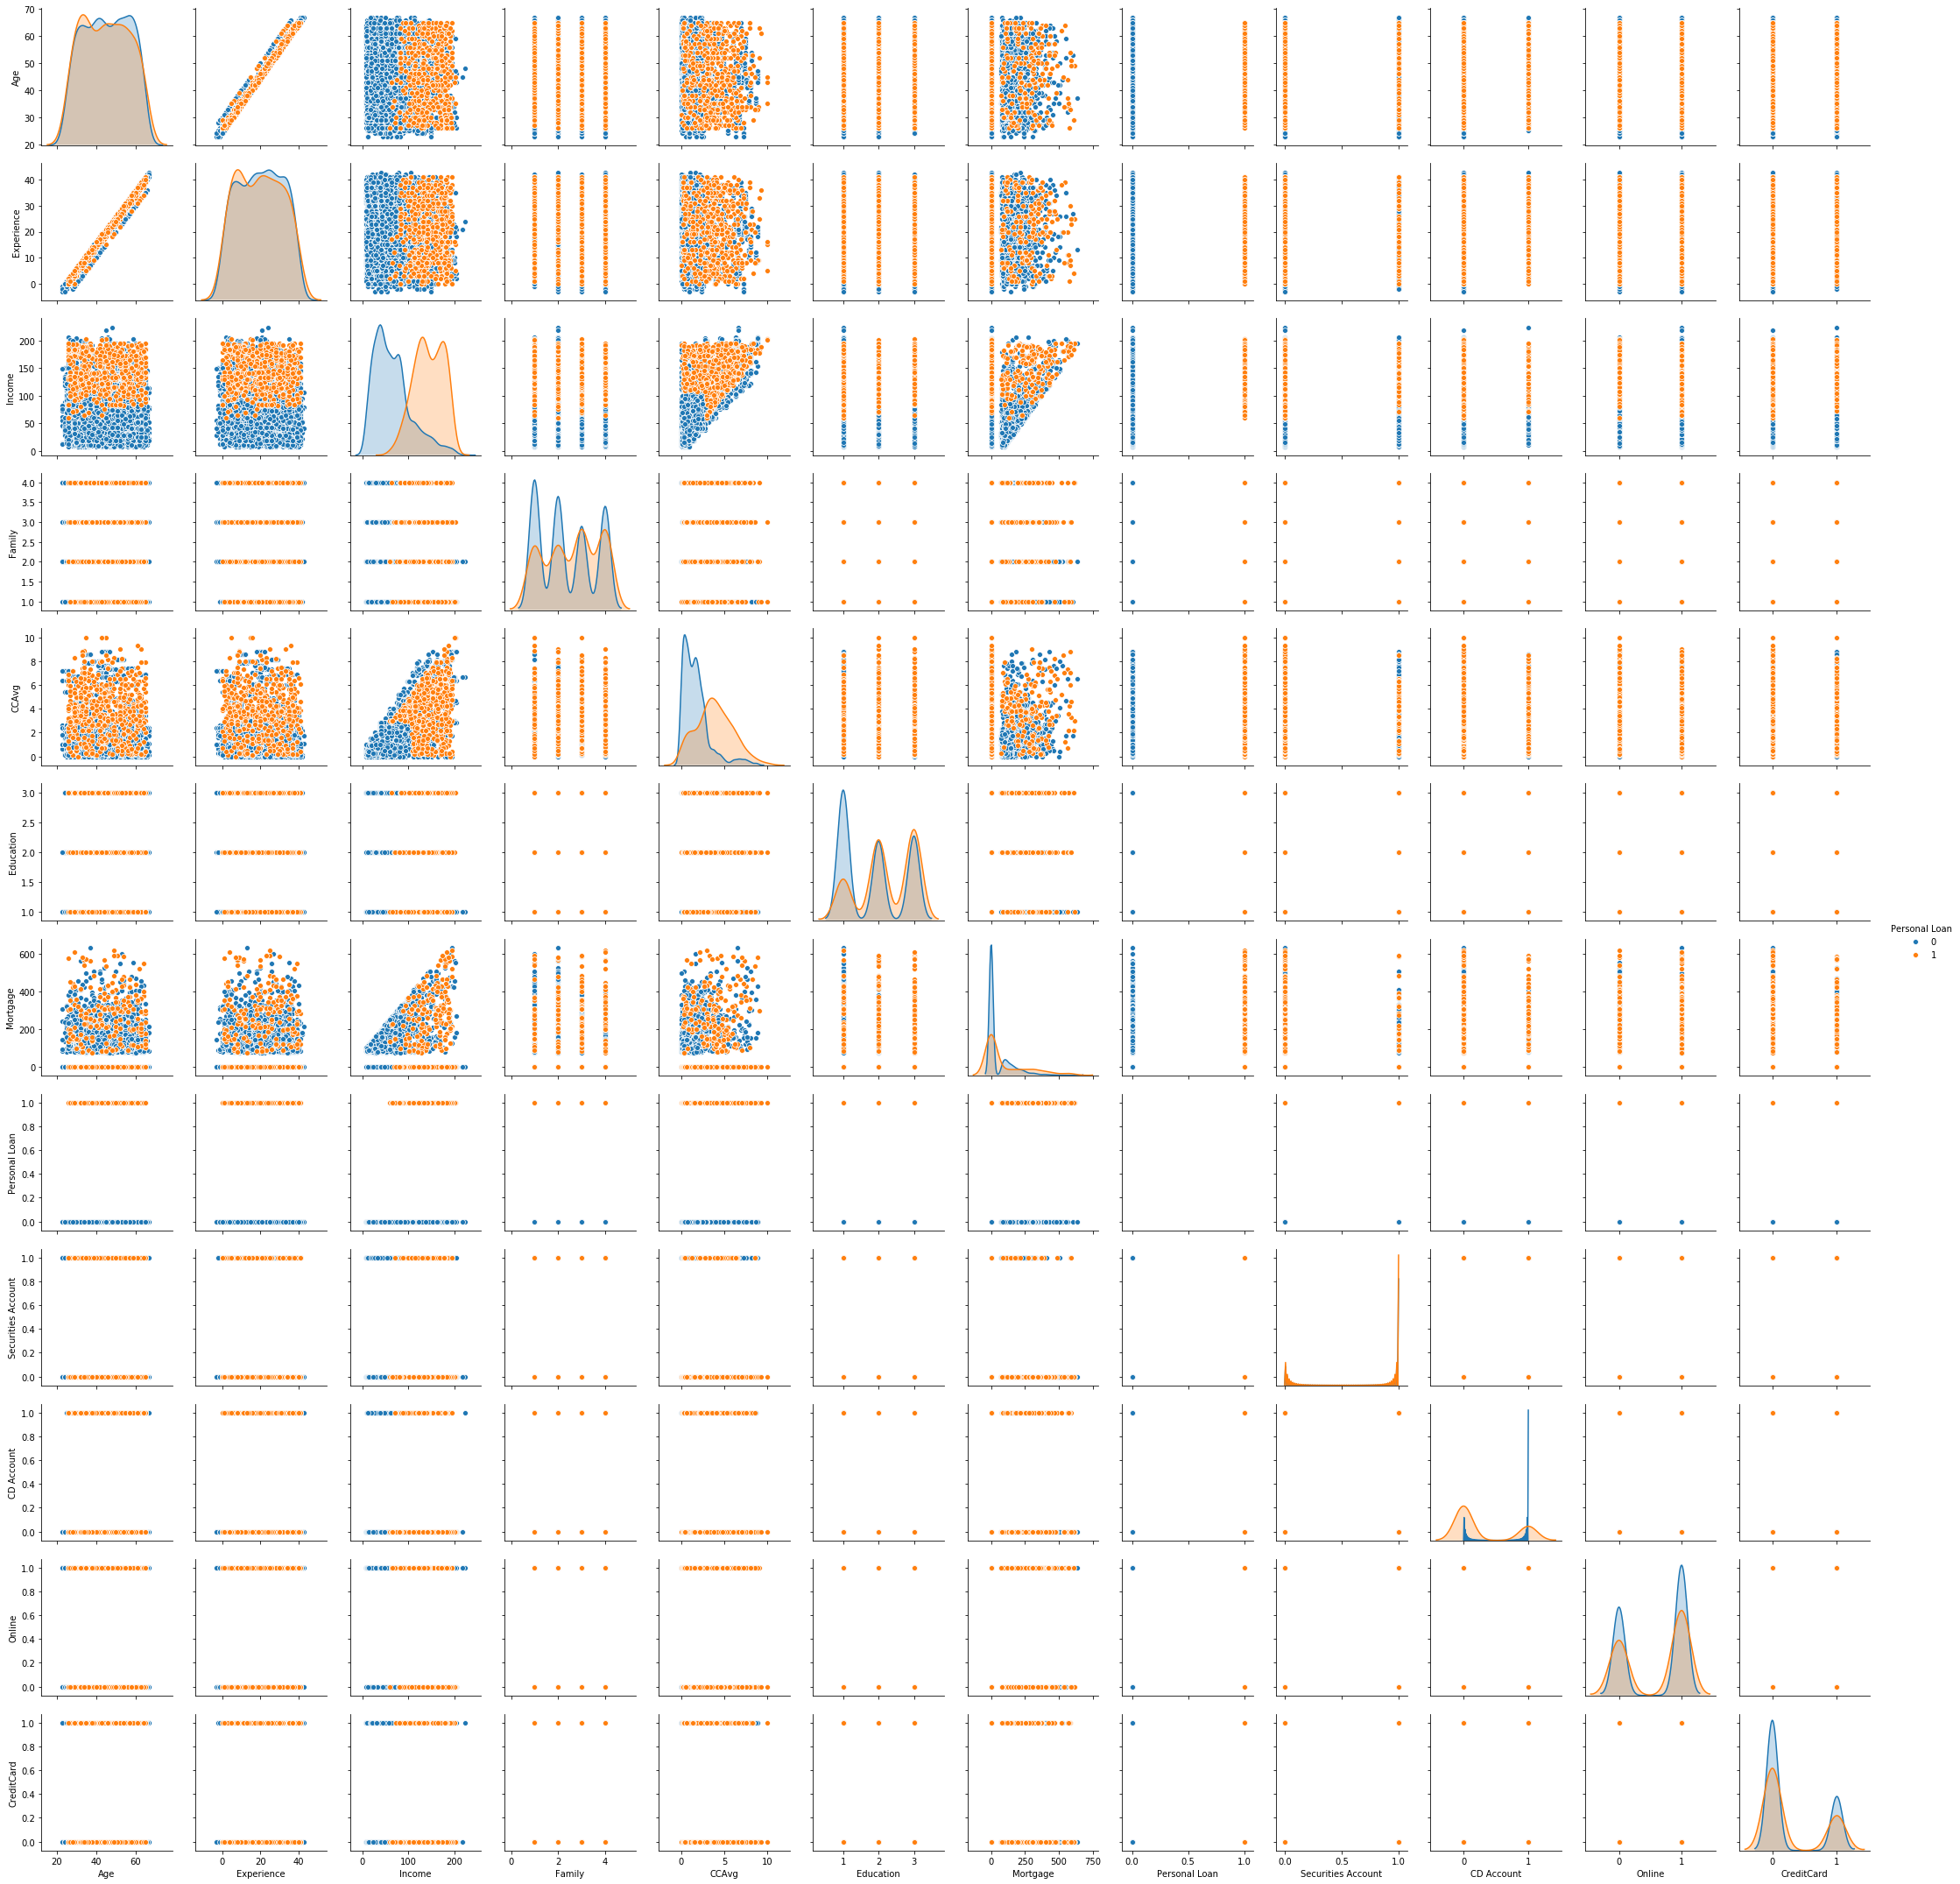

In [18]:
# visualizing the target with other attributes
sns.pairplot(df_thera.drop(['ID','ZIP Code'], axis=1), hue='Personal Loan')
plt.show()

In [19]:
# Income and cc avg attributes are having good classfication for the Target variables. Hence can be good predictors.

In [20]:
# Checking the negative values for the Experience 
print("There are", len(df_thera[df_thera['Experience'] < 0]), "rows with negative experience.")
df_neg_Exp = df_thera[df_thera['Experience'] < 0]

There are 52 rows with negative experience.


In [21]:
#1. Almost 1% of the data is not clean, having negative experience.
#2. Will replace the experience with the median experience of the customers with the same age.

In [22]:
# median of experience for all the ages available
df_age_Exp = df_thera[df_thera['Experience'] >= 0].groupby('Age').median()
df_age_Exp.reset_index(inplace=True)

In [23]:
# method to assign the negative experience with the median values of experince for the matching age
def applymedianExperience(row):
    if(row['Experience'] < 0):
        len_of_age = len(df_age_Exp[df_age_Exp.Age ==  row['Age']])
        
        # if there are no age matching the median dataframe(here the age should be 23 then we assign 0)
        if(len_of_age == 0):
            return 0
        else:
            return df_age_Exp[df_age_Exp.Age ==  row['Age']].Experience.astype(np.int64)
        
    else:
        return row['Experience']    

In [24]:
# replacing the experience of the negative values with medain of the experience for the particular age
df_thera['Experience'] = df_thera.apply(applymedianExperience, axis=1)

# converting the column to the type integer
df_thera['Experience'] = df_thera['Experience'].astype(np.int64)

In [25]:
# removing the attributes ID, Zip code as they can be identity columns and will not be effective for the model
df_thera.drop(labels=['ID', 'ZIP Code'], axis=1, inplace=True)

In [26]:
df_thera.sample(7)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1221,30,5,121,2,3.3,1,0,0,0,0,0,1
1801,35,10,78,1,2.6,2,0,0,0,0,0,0
2102,25,1,81,2,1.6,3,0,0,0,0,1,1
423,43,19,161,2,7.5,1,0,0,0,0,0,0
1633,62,38,53,1,0.0,2,0,0,0,0,0,0
2987,33,7,39,2,2.0,3,0,0,0,0,0,0
4527,41,16,18,1,0.6,3,0,0,0,0,0,1


In [27]:
#checking the correlation of the attributes
df_thera.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994214,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994214,1.000000,-0.046880,-0.052119,-0.050030,0.014071,-0.010950,-0.008060,-0.001258,0.009905,0.013765,0.009073
Income,-0.055269,-0.046880,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052119,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050030,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.014071,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010950,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008060,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001258,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009905,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


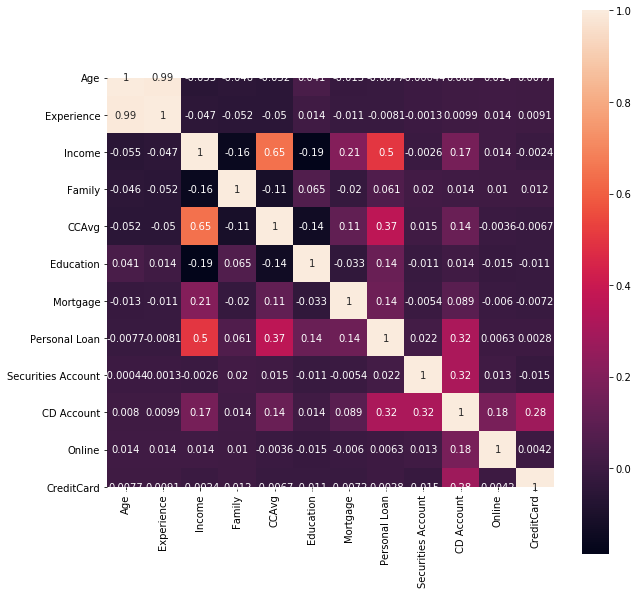

In [28]:
# heat map to visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_thera.corr(),square=True, annot=True)
plt.show()

In [29]:
# the target attribute is having better correlation with the Income and CCAvg

In [30]:
# split the data to independent and target attributes
X = df_thera.drop('Personal Loan', axis =1)
y = df_thera['Personal Loan']

In [31]:
#split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 11)
(3500,)
(1500, 11)
(1500,)


In [32]:
# standardizing the dataset
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# KNN

In [33]:
neighbors = np.arange(1, 61)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
acc_scores_nbors= []

# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    scores_kvalues = []
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train.append(knn.score(X_train,y_train))
    test.append(knn.score(X_test,y_test))
    
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    
    # make predictions
    y_pred= knn.predict(X_test) 
    score = accuracy_score(y_test, y_pred)
    acc_scores_nbors.append((score,k))  

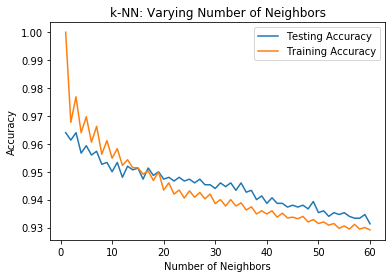

In [34]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [35]:
# identifying the optimal k value
#1. from the plot could observe the score has max value in the range 3-10
#2. finding the best k value
print("The optimal value for k is", max(acc_scores_nbors)[1])

The optimal value for k is 3


In [36]:
# building the final model
final = KNeighborsClassifier(n_neighbors=3)
final.fit(X_train,y_train)
y_pred = final.predict(X_test)

In [37]:
# confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("Confusion matrix: \n", cnf_matrix)
print("\n Classification report: \n", classification_report(y_test, y_pred))
print("\n Accuracy score:", accuracy_score(y_test, y_pred))

Confusion matrix: 
           Predict 0  Predict 1
Actual 0       1355          7
Actual 1         47         91

 Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1362
           1       0.93      0.66      0.77       138

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500


 Accuracy score: 0.964


In [39]:
#1. Model has the accuracy score of 96.4%
#2. Model is able to predict customer availing loan to 93% and not availing loan to be 97%
#3. Model is able to detect the customer availing loan to 66% and not availing loan to be 99%

# Logistic Regression

In [40]:
# logistic regression
model_lr = LogisticRegression()

In [41]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred_lr = model_lr.predict(X_test)

In [43]:
# confusion matrix
cnf_matrix_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_lr), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("Confusion matrix: \n", cnf_matrix_lr)
print("\n Classification report: \n", classification_report(y_test, y_pred_lr))
print("\n Accuracy score:", accuracy_score(y_test, y_pred_lr))

Confusion matrix: 
           Predict 0  Predict 1
Actual 0       1343         19
Actual 1         49         89

 Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.82      0.64      0.72       138

    accuracy                           0.95      1500
   macro avg       0.89      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500


 Accuracy score: 0.9546666666666667


In [44]:
#1. Model has the accuracy score of 95.47%
#2. Model is able to predict customer availing loan to 82% and not availing loan to be 96%
#3. Model is able to detect the customer availing loan to 64% and not availing loan to be 99%

# Naive Bayes

In [45]:
clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

In [46]:
y_pred_GNB=clf_GNB.predict(X_test)

In [47]:
# confusion matrix
cnf_matrix_GNB = pd.DataFrame(confusion_matrix(y_test, y_pred_GNB), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("Confusion matrix: \n", cnf_matrix_GNB)
print("\n Classification report: \n", classification_report(y_test, y_pred_GNB))
print("\n Accuracy score:", accuracy_score(y_test, y_pred_GNB))

Confusion matrix: 
           Predict 0  Predict 1
Actual 0       1237        125
Actual 1         56         82

 Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500


 Accuracy score: 0.8793333333333333


In [48]:
#1. Model has the accuracy score of 87.9%
#2. Model is able to predict customer availing loan to 40% and not availing loan to be 96%
#3. Model is able to detect the customer availing loan to 59% and not availing loan to be 91%

# Models Comparision

In [49]:
model_results = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('KNN', KNeighborsClassifier()),
          ('GaussianNB', GaussianNB())]

In [50]:
for model_name, model in models:
    results = model_selection.cross_val_score(model, X_train, y_train, cv=20, scoring='accuracy')
    model_results.append(results)
    model_names.append(model_name)
    print("Model =", model_name, " : Mean =", round(results.mean(),5), ": STD=", round(results.std(),5))

Model = LogReg  : Mean = 0.95114 : STD= 0.0167
Model = KNN  : Mean = 0.95743 : STD= 0.01258
Model = GaussianNB  : Mean = 0.88141 : STD= 0.02653


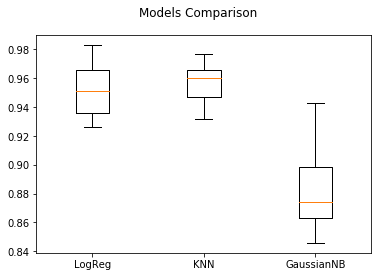

In [51]:
fig = plt.figure()
fig.suptitle('Models Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(model_names)
plt.show()

In [52]:
#1. The KNN and the Logistic Regression has almost the same scores obtained.
#2. From the plot, KNN seems to be better model compared to the Logistic regression as it has less deviation/variation 
#   with the scores.
#3. Naive Bayes model provides less score values and could see more variation in the scores.
#4. Also, from the above confusion matrices and the classification reports it could be observed that KNN model has the 
#   better f1 score and ability to predict or detect correctly if the customer will avail personal loan or not.